##Machine Learning for Stroke Prediction

Contents:
Part 0: Assessment Submission Form
Part 1: Introduction
Part 2: Data Exploration and Preprocessing
Part 3: Feature Engineering
Part 4: Model Training and Tuning
Part 5: Model Assessment
Part 6: Final Discussion and Recommendations

In [ ]:
from IPython.display import display, Image


Part 1: Introduction
According to the World Stroke Organization, strokes are one of the leading causes of death and disability across the globe, with 1 in 4 adults over the age of 25 expected to experience a stroke during their lifetime (WSO, n.d.). That is why it is essential for everyone ,and for healthcare organizations especially, to understand what factors have the most effect on an individual's risk of getting a stroke so, what medical conditions, healthcare factors, and demographic elements influence an individual's risk of experiencing a stroke? Can we create a machine elarning algorithm that can predict that? Creating efficient machine Learning algorithms that aid us in understanding this information can greatly improve the quality of healthcare given to patients, aid healthcare providers in identifying high-risk individuals and possibly prevent a stroke from happening, leading to more rapid and accurate diagnosis and treatment, therefore; resulting in a better use of resources, and better patient outcomes. I will be using a dataset from kaggle to demonstrate how we can create a machine learning pipeline that demonstrates the relationship between the parameters found in the below table and whether an individual had a stroke or not.

source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 
(original source of data is confidential as indicated on kaggle by the publisher)

!DISCLAIMER: the below description of attributes was directly copied from the above kaggle link!
Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for (fedesoriano, 2020)this patient


Part 2: Data Exploration and Preprocessing

In [187]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score
from sklearn.model_selection import cross_val_score

In [4]:
#viewing the dataset
pd.read_csv('healthcare-dataset-stroke-data.csv')
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
# getting info about the Range index, column names, and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
# dropping the id column since it has no use in this pipeline
df.drop(['id'], axis = 1, inplace = True)

In [9]:
# checking for null values
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [11]:
# getting the total number of null values in the column
null_count = df['bmi'].isnull().sum()
print(f"null_count: {null_count}")

null_count: 201


In [13]:
# checking the percentage of data that is missing to better understand the effect of the null values
bmi_missing = df['bmi'].isna().value_counts()
print(f'{round(bmi_missing[1]/(bmi_missing[0] + bmi_missing[1])*100,3)} % of bmi data is missing')

3.933 % of bmi data is missing


C:\Users\lamat\AppData\Local\Temp\ipykernel_9108\1746748700.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{round(bmi_missing[1]/(bmi_missing[0] + bmi_missing[1])*100,3)} % of bmi data is missing')


In [23]:
# chose the median to fill the nulls. I chose median due to the possibility of outliers since it is a better measure that is not significantly affected by outliers.
bmi_median = df['bmi'].median()

df['bmi'].fillna(bmi_median, inplace=True)

print(df['bmi'].isnull().sum()) # checking if there are null values left

0


Quick histoplot visualization of gender and age to better understand the distribution of these attributes

C:\Users\lamat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

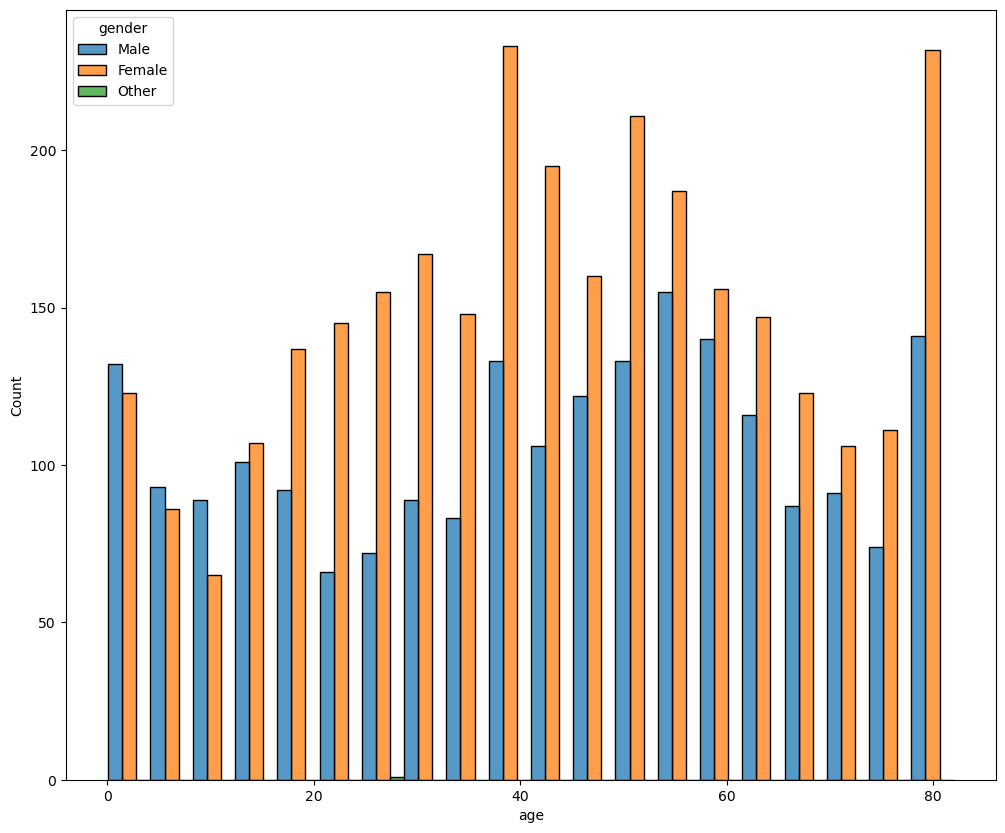

In [35]:
plt.figure(figsize = (12,10))
sns.histplot(data=df, x=df.age, hue=df.gender, multiple="dodge", shrink=1.0)

Part 3: Feature Engineering

One-hot encoding the categorical columns to prepare them for the machine learning models

In [25]:
categ_cols = df.select_dtypes(include=['object']).columns

df_2 = pd.get_dummies(df, columns=categ_cols, drop_first=True)

print(df_2.head())

    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
1  61.0             0              0             202.21  28.1       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False  

Below, I checked whether the target label is balaned. In this case, whether the number of people who didn't have a stroke (0) and the number of people who did is balanced. As is clear from the p/rinted result the negative and positive cases are not balanced. That can create bias and other issues in the machine learning pipeline so I will resample the data and balance it.

In [17]:
#checking the balance
target = df['stroke'].value_counts()
print(target)

stroke
0    4861
1     249
Name: count, dtype: int64


splitting the data to train and test

In [43]:
X = df_2.drop('stroke', axis=1)  # dropped the target to have features only as X
y = df_2['stroke']  # setting stroke as y (the target label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # 

scaling and using SMOTE (Synthetic Minority Over-sampling Technique) to balance the target label values. 

In [209]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
# printing the result to compare the difference
print("Original target distribution:", y_train.value_counts())
print("Resampled target distribution:", y_train_resampled.value_counts())

Original target distribution: stroke
0    3403
1     174
Name: count, dtype: int64
Resampled target distribution: stroke
0    3403
1    3403
Name: count, dtype: int64


Now that the data has been cleaned and split into train and test and we have a balanced target label we can start with Model testing

Part 4: Model Training and Tuning

Because of the nature of this dataset, I chose Logistic Regression (appropriate since stoke predicition is a binary classification task) , Random Forest (also suitable for non-linear relationships), and Gradient Boosting (high accuracy and can compare it with Logistic Regression since it usually outperforms it). I chose them because they are overall easy to implement and are appropriate for medical prediction tasks.  I will be testing them based on different evaluation metrics and I'll compare the results to each other to determine the best one. The evaluation metrics matter for this dataset and that I'll be measuring are Accuracy, precision, and F1-score. The reason why I chose these hyperparameters is because they firt best with the purpose of my pipeline. For the stroke prediction algorithm, it is important that it predicts whether someone could have a stroke and that it does not miss possible stroke cases.

I used the resampled train data for the X and y and used GridSearch cross-validation to determine the best parameters for each algorithm and for the respective evaluation metrics. I chose a few parameters and included them in a grid bur there are many more that can be tuned to test for results. I also selected the parameters that I understood and are considered the most important for each algorithm.

1) LogisticRegression (LR)

In [147]:
LR = LogisticRegression(random_state=42)

params_grid1 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500]
}
grid_search_LR_f1 = GridSearchCV(LR, params_grid1, cv=5, scoring='f1', verbose=1, n_jobs=-1)    
grid_search_LR_accuracy = GridSearchCV(LR, params_grid1, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)    
grid_search_LR_precision = GridSearchCV(LR, params_grid1, cv=5, scoring='precision', verbose=1, n_jobs=-1) 

grid_search_LR_f1.fit(X_train_resampled, y_train_resampled)
grid_search_LR_accuracy.fit(X_train_resampled, y_train_resampled)
grid_search_LR_precision.fit(X_train_resampled, y_train_resampled)

print("Best LR Parameters for F1 score:", grid_search_LR_f1.best_params_) 
print("Best F1 = {:.2f}".format(grid_search_LR_f1.best_score_))
      
print("Best LR Parameters for Accuracy:", grid_search_LR_accuracy.best_params_)
print("Best Accuracy = {:.2f}".format(grid_search_LR_accuracy.best_score_))
      
print("Best LR Parameters for Precision:", grid_search_LR_precision.best_params_)
print("Best Precision = {:.2f}".format(grid_search_LR_precision.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\linear_model\_l

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\linear_model\_l

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best LR Parameters for F1 score: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 = 0.81
Best LR Parameters for Accuracy: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy = 0.79
Best LR Parameters for Precision: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Precision = 0.77


C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\linear_model\_l

2) Random Forest (rf/ RF)

The below code took a long time to run due to the size and number of the hyperparameters, I also noticed that the use of range() usually also leads to increased run times. Some ways we can decrease the run times are decreasing the hyperparameters or letting the algorithm automate them so that it takes less time and runs efficiently. 

In [153]:
rf = RandomForestClassifier(random_state=42)

params_grid2 = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': range(100, 200,300),
    'max_depth': range(10, 20, 30),  
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']    
}

grid_search_rf_f1 = GridSearchCV(rf, params_grid2, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf_accuracy = GridSearchCV(rf, params_grid2, cv=5, scoring='accuracy', n_jobs=-1)    
grid_search_rf_precision = GridSearchCV(rf, params_grid2, cv=5, scoring='precision', n_jobs=-1) 

grid_search_rf_f1.fit(X_train_resampled, y_train_resampled)
grid_search_rf_accuracy.fit(X_train_resampled, y_train_resampled)
grid_search_rf_precision.fit(X_train_resampled, y_train_resampled)

print("Best RF Parameters for F1 score:", grid_search_rf_f1.best_params_) 
print("Best F1 = {:.2f}".format(grid_search_rf_f1.best_score_))
      
print("Best RF Parameters for Accuracy:", grid_search_rf_accuracy.best_params_)
print("Best Accuracy = {:.2f}".format(grid_search_rf_accuracy.best_score_))
      
print("Best RF Parameters for Precision:", grid_search_rf_precision.best_params_)
print("Best Precision = {:.2f}".format(grid_search_rf_precision.best_score_))

C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\lamat\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Best RF Parameters for F1 score: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 = 0.92
Best RF Parameters for Accuracy: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy = 0.91
Best RF Parameters for Precision: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Precision = 0.86


3) Gradient Boosting Machine (GBM)

When I intially ran the below cell similarly to the ones above and using the same code flow, it took a very long time and was not printing a result, so I had to make some adjustments but I wanted to keep it to demonstrate what I add then I made a new cell below it with the updated code. (the new time was about 6 mins)

In [ ]:
GBM = GradientBoostingClassifier(random_state=42)

params_grid3 = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'learning_rate': [0.01, 0.1, 0.05],
    'min_samples_leaf': [1, 2, 4],
} 

grid_search_GBM_f1 = GridSearchCV(GBM, params_grid3, cv=5, scoring='f1', n_jobs=-1)
grid_search_GBM_accuracy = GridSearchCV(GBM, params_grid3, cv=5, scoring='accuracy', n_jobs=-1)    
grid_search_GBM_precision = GridSearchCV(GBM, params_grid3, cv=5, scoring='precision', n_jobs=-1) 

grid_search_GBM_f1.fit(X_train_resampled, y_train_resampled)
grid_search_GBM_accuracy.fit(X_train_resampled, y_train_resampled)
grid_search_GBM_precision.fit(X_train_resampled, y_train_resampled)

print("Best GBM Parameters for F1 score:", grid_search_GBM_f1.best_params_) 
print("Best F1 = {:.2f}".format(grid_search_GBM_f1.best_score_))
      
print("Best GBM Parameters for Accuracy:", grid_search_GBM_accuracy.best_params_)
print("Best Accuracy = {:.2f}".format(grid_search_GBM_accuracy.best_score_))
      
print("Best GBM Parameters for Precision:", grid_search_GBM_precision.best_params_)
print("Best Precision = {:.2f}".format(grid_search_GBM_precision.best_score_))

Instead of running separate GridSearch processes for each metric, I joined them together so it will only run one process I used refit and I used scoring to store the different metrics and their names as a single dictionary. I also did the refitting based on only one metric, but the model is still evaluated based on all metrics.

Final tests and Evaluation for The Gradient Boosting Machine

In [159]:
GBM = GradientBoostingClassifier(random_state=42)

params_grid3 = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'learning_rate': [0.01, 0.1, 0.05],
    'min_samples_leaf': [1, 2, 4],
} 

scoring = {'f1': 'f1', 'accuracy': 'accuracy', 'precision': 'precision'}

grid_search_GBM = GridSearchCV(GBM, params_grid3, cv=5, scoring=scoring, refit='f1', n_jobs=-1, verbose=2) #joined evaluation metrics into a single funtion

# Fitting the model once instead of doing separately for each metric
grid_search_GBM.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and scores for F1, Accuracy, and Precision
print("Best GBM Parameters:", grid_search_GBM.best_params_)
print("Best F1 = {:.2f}".format(grid_search_GBM.cv_results_['test_f1'][grid_search_GBM.best_index_]))
print("Best Accuracy = {:.2f}".format(grid_search_GBM.cv_results_['test_accuracy'][grid_search_GBM.best_index_]))
print("Best Precision = {:.2f}".format(grid_search_GBM.cv_results_['test_precision'][grid_search_GBM.best_index_]))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best GBM Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 = 0.96
Best Accuracy = 0.96
Best Precision = 0.97


Based on the results of the previous code cells, GBM performed best overall, second best was Random Forest and Logistic Regression performed the worst of all three algorithms. 

Part 5: Model Assessment

In the following cells I will be measuring the different evaluation metrics again but only on the test set, this is to ensure that the results apply to the final Test data and validates it.

In [205]:
y_pred = grid_search_GBM.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("F1 Score on Test Set: {:.2f}".format(f1))
print("Accuracy on Test Set: {:.2f}".format(accuracy))
print("Precision on Test Set: {:.2f}".format(precision))

print("Classification Report:")
print(classification_report(y_test, y_pred))

F1 Score on Test Set: 0.12
Accuracy on Test Set: 0.93
Precision on Test Set: 0.16
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1458
           1       0.16      0.09      0.12        75

    accuracy                           0.93      1533
   macro avg       0.56      0.53      0.54      1533
weighted avg       0.92      0.93      0.92      1533



Part 6: Final Discussion and Recommendations

As shown in the test results above, we got about 0.95 for Accuracy, 0.9 for precision, 0.95 for recall and 0.93 for f1-score. These are great results because they are all positive and very close to 1. That indicates that we have successfully trained a machine learning model that can make correct, precise, and accurate predictions regarding our target label (stroke) using the attributes that we have.

Overall, all the selected models that I tested out at the beginning performed relatively well as their evaluation values were all positive values ranging from 0.7-0.99, but of course Random Forest very blatantly outperformed the others. Could there be another model that outperforms the one I selected? Possibly, but I selected these models based on my experience with them and their relevance to my data and task. The above tests also prove that yes it is possible to create an algorithm that can predict the possibility of an individual having a stroke and can compare different attributes to determine which are influential. My recommendation would be to start using this algorithm and to test it out, feeding it more data overtime and of course fine-tuning it until it reaches it's optimal potential and can make predictions efficiently.

Additional informational sources:
World Stroke Organization. (n.d.). Impact of Stroke. [online] Available at: https://www.world-stroke.org/world-stroke-day-campaign/about-stroke/impact-of-stroke.
‌